<a href="https://colab.research.google.com/github/fastdatascience/clinical_trial_risk/blob/fixes_nov_2022/train/ctgov/TrainCountries01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import re
import os
import sys
import pickle as pkl
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
from IPython.display import display
import matplotlib.pyplot as plt
import numpy as np
import json

# df_annotations = pd.read_csv("all_annotations.csv")


# Get data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
with open("/content/drive/MyDrive/data/protocols.pkl.gz", "rb") as f:
    file_to_pages = pkl.load(f)

In [ ]:
import spacy
nlp = spacy.blank("en")

In [ ]:
df_annotations= pd.read_csv("/content/drive/MyDrive/data/filtered_for_phase_arms_subjects_02.csv.bz2")

In [ ]:
!pip install country_named_entity_recognition

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 10.1 MB 3.7 MB/s 
  Created wheel for pycountry: filename=pycountry-22.1.10-py2.py3-none-any.whl size=10595786 sha256=668f17ad4f5215e784b451bcf2e378af02b967e180ccd5bd03a075a35df7a676
  Stored in directory: /root/.cache/pip/wheels/f7/8f/9c/b070d7376caf2beb0685bf72578106b2fd57019ed57d84f126
Successfully built pycountry


In [ ]:
from country_named_entity_recognition import find_countries

In [ ]:
import re

import pycountry

demonym_to_country_code = {'ARUBAN': 'AW',
                           'AFGHAN': 'AF',
                           'ANGOLAN': 'AO',
                           'ANGUILLIAN': 'AI',
                           'ALBANIAN': 'AL',
                           'EMIRATI': 'AE',
                           'ARGENTINEAN': 'AR',
                           'ARMENIAN': 'AM',
                           'AMERICAN SAMOAN': 'AS',
                           'FRENCH': 'PM',
                           'ANTIGUAN': 'AG',
                           'BARBUDAN': 'AG',
                           'AUSTRALIAN': 'AU',
                           'AUSTRIAN': 'AT',
                           'AZERBAIJANI': 'AZ',
                           'BURUNDIAN': 'BI',
                           'BELGIAN': 'BE',
                           'BENINESE': 'BJ',
                           'BURKINABE': 'BF',
                           'BANGLADESHI': 'BD',
                           'BULGARIAN': 'BG',
                           'BAHRAINI': 'BH',
                           'BAHAMIAN': 'BS',
                           'BOSNIAN': 'BA',
                           'HERZEGOVINIAN': 'BA',
                           'BELARUSIAN': 'BY',
                           'BELIZEAN': 'BZ',
                           'BERMUDIAN': 'BM',
                           'BOLIVIAN': 'BO',
                           'BRAZILIAN': 'BR',
                           'BARBADIAN': 'BB',
                           'BRUNEIAN': 'BN',
                           'BHUTANESE': 'BT',
                           'MOTSWANA': 'BW',
                           'CENTRAL AFRICAN': 'CF',
                           'CANADIAN': 'CA',
                           'COCOS ISLANDER': 'CC',
                           'SWISS': 'CH',
                           'CHILEAN': 'CL',
                           'CHINESE': 'MO',
                           'IVORIAN': 'CI',
                           'CAMEROONIAN': 'CM',
                           'CONGOLESE': 'CG',
                           'COOK ISLANDER': 'CK',
                           'COLOMBIAN': 'CO',
                           'COMORAN': 'KM',
                           'CAPE VERDIAN': 'CV',
                           'COSTA RICAN': 'CR',
                           'CUBAN': 'CU',
                           'CHRISTMAS ISLAND': 'CX',
                           'CAYMANIAN': 'KY',
                           'CYPRIOT': 'CY',
                           'CZECH': 'CZ',
                           'GERMAN': 'DE',
                           'DJIBOUTI': 'DJ',
                           'DOMINICAN': 'DO',
                           'DANISH': 'DK',
                           'ALGERIAN': 'DZ',
                           'ECUADOREAN': 'EC',
                           'EGYPTIAN': 'EG',
                           'ERITREAN': 'ER',
                           'SAHRAWI': 'EH',
                           'SPANISH': 'ES',
                           'ESTONIAN': 'EE',
                           'ETHIOPIAN': 'ET',
                           'FINNISH': 'FI',
                           'FIJIAN': 'FJ',
                           'FALKLAND ISLANDER': 'FK',
                           'FAROESE': 'FO',
                           'MICRONESIAN': 'FM',
                           'GABONESE': 'GA',
                           'BRITISH': 'GB',
                           'GEORGIAN': 'GE',
                           'CHANNEL ISLANDER': 'JE',
                           'GHANAIAN': 'GH',
                           'GIBRALTAR': 'GI',
                           'GUINEAN': 'GN',
                           'GUADELOUPIAN': 'GP',
                           'GAMBIAN': 'GM',
                           'GUINEA-BISSAUAN': 'GW',
                           'EQUATORIAL GUINEAN': 'GQ',
                           'GREEK': 'GR',
                           'GRENADIAN': 'GD',
                           'GREENLANDIC': 'GL',
                           'GUATEMALAN': 'GT',
                           'GUAMANIAN': 'GU',
                           'GUYANESE': 'GY',
                           'HEARD AND MCDONALD ISLANDER': 'HM',
                           'HONDURAN': 'HN',
                           'CROATIAN': 'HR',
                           'HAITIAN': 'HT',
                           'HUNGARIAN': 'HU',
                           'INDONESIAN': 'ID',
                           'MANX': 'IM',
                           'INDIAN': 'IO',
                           'IRISH': 'IE',
                           'IRANIAN': 'IR',
                           'IRAQI': 'IQ',
                           'ICELANDER': 'IS',
                           'ISRAELI': 'IL',
                           'ITALIAN': 'IT',
                           'JAMAICAN': 'JM',
                           'JORDANIAN': 'JO',
                           'JAPANESE': 'JP',
                           'KAZAKHSTANI': 'KZ',
                           'KENYAN': 'KE',
                           'KIRGHIZ': 'KG',
                           'CAMBODIAN': 'KH',
                           'I-KIRIBATI': 'KI',
                           'KIRIBATI': 'KI',
                           'KITTIAN AND NEVISIAN': 'KN',
                           'SOUTH KOREAN': 'KR',
                           'KUWAITI': 'KW',
                           'LAOTIAN': 'LA',
                           'LEBANESE': 'LB',
                           'LIBERIAN': 'LR',
                           'LIBYAN': 'LY',
                           'SAINT LUCIAN': 'LC',
                           'LIECHTENSTEINER': 'LI',
                           'SRI LANKAN': 'LK',
                           'MOSOTHO': 'LS',
                           'LITHUANIAN': 'LT',
                           'LUXEMBOURGER': 'LU',
                           'LATVIAN': 'LV',
                           'MOROCCAN': 'MA',
                           'MONEGASQUE': 'MC',
                           'MOLDOVAN': 'MD',
                           'MALAGASY': 'MG',
                           'MALDIVAN': 'MV',
                           'MEXICAN': 'MX',
                           'MARSHALLESE': 'MH',
                           'MACEDONIAN': 'MK',
                           'MALIAN': 'ML',
                           'MALTESE': 'MT',
                           'MONGOLIAN': 'MN',
                           'AMERICAN': 'US',
                           'MOZAMBICAN': 'MZ',
                           'MAURITANIAN': 'MR',
                           'MONTSERRATIAN': 'MS',
                           'MAURITIAN': 'MU',
                           'MALAWIAN': 'MW',
                           'MALAYSIAN': 'MY',
                           'NAMIBIAN': 'NA',
                           'NEW CALEDONIAN': 'NC',
                           'NIGERIEN': 'NE',
                           'NORFOLK ISLANDER': 'NF',
                           'NIGERIAN': 'NG',
                           'NICARAGUAN': 'NI',
                           'NIUEAN': 'NU',
                           'DUTCH': 'NL',
                           'NORWEGIAN': 'SJ',
                           'NEPALESE': 'NP',
                           'NAURUAN': 'NR',
                           'NEW ZEALANDER': 'NZ',
                           'OMANI': 'OM',
                           'PAKISTANI': 'PK',
                           'PANAMANIAN': 'PA',
                           'PITCAIRN ISLANDER': 'PN',
                           'PERUVIAN': 'PE',
                           'FILIPINO': 'PH',
                           'PALAUAN': 'PW',
                           'PAPUA NEW GUINEAN': 'PG',
                           'POLISH': 'PL',
                           'PUERTO RICAN': 'PR',
                           'NORTH KOREAN': 'KP',
                           'PORTUGUESE': 'PT',
                           'PARAGUAYAN': 'PY',
                           'FRENCH POLYNESIAN': 'PF',
                           'QATARI': 'QA',
                           'ROMANIAN': 'RO',
                           'RUSSIAN': 'RU',
                           'RWANDAN': 'RW',
                           'SAUDI ARABIAN': 'SA',
                           'SUDANESE': 'SD',
                           'SENEGALESE': 'SN',
                           'SINGAPOREAN': 'SG',
                           'SOUTH GEORGIA AND THE SOUTH SANDWICH ISLANDER': 'GS',
                           'SAINT HELENIAN': 'SH',
                           'SOLOMON ISLANDER': 'SB',
                           'SIERRA LEONEAN': 'SL',
                           'SALVADORAN': 'SV',
                           'SAMMARINESE': 'SM',
                           'SOMALI': 'SO',
                           'SOUTH SUDANESE': 'SS',
                           'SAO TOMEAN': 'ST',
                           'SURINAMER': 'SR',
                           'SLOVAK': 'SK',
                           'SLOVENE': 'SI',
                           'SWEDISH': 'SE',
                           'SWAZI': 'SZ',
                           'SEYCHELLOIS': 'SC',
                           'SYRIAN': 'SY',
                           'CHADIAN': 'TD',
                           'TOGOLESE': 'TG',
                           'THAI': 'TH',
                           'TADZHIK': 'TJ',
                           'TAJIK': 'TJ',
                           'TOKELAUAN': 'TK',
                           'TURKMEN': 'TM',
                           'EAST TIMORESE': 'TL',
                           'TONGAN': 'TO',
                           'TRINIDADIAN': 'TT',
                           'TUNISIAN': 'TN',
                           'TURKISH': 'TR',
                           'TUVALUAN': 'TV',
                           'TAIWANESE': 'TW',
                           'TANZANIAN': 'TZ',
                           'UGANDAN': 'UG',
                           'UKRAINIAN': 'UA',
                           'URUGUAYAN': 'UY',
                           'UZBEKISTANI': 'UZ',
                           'SAINT VINCENTIAN': 'VC',
                           'VENEZUELAN': 'VE',
                           'VIETNAMESE': 'VN',
                           'NI-VANUATU': 'VU',
                           'WALLIS AND FUTUNA ISLANDER': 'WF',
                           'SAMOAN': 'WS',
                           'YEMENI': 'YE',
                           'SOUTH AFRICAN': 'ZA',
                           'ZAMBIAN': 'ZM',
                           'ZIMBABWEAN': 'ZW'}

demonym_to_country = dict(
    [demonym, pycountry.countries.lookup(alpha_2)]
    for demonym, alpha_2 in demonym_to_country_code.items()
)

people = {"adults", "men", "women", "children", "infants", "toddlers", "sex workers",
          "communities", "community",
          "population",
          "males", "male adults", "females",
          "female adults", "individuals",
          "volunteers", "babies", "teenagers", "adolescents", "pregnant"}

country_pattern = "(" + "|".join(demonym_to_country_code) + ")"
people_pattern = "(" + "|".join(people) + ")"

demonym_regex = re.compile(f"(?i)\\b(?:{country_pattern}(?:s|\\s*{people_pattern}))\\b")


def find_demonyms(text: str) -> list:
    """
    Find the nationalities mentioned in the text that clearly refer to study subjects, e.g. Samoan males.
    :param text: the text of the protocol page
    :return: nationalities found as a list of tuples (PyCountry object and Match object).
    """
    country_matches = []

    matches = demonym_regex.finditer(text)
    for match in matches:
        matched_country = demonym_to_country[match.groups()[0].upper()]
        country_matches.append((matched_country, match))

    return country_matches


In [ ]:
def get_contexts(pages):

    country_to_contexts = {}

    for page_no, page_text in enumerate(pages):
        countries = find_countries(page_text)

        demonyms = find_demonyms(page_text)

        matches = []
        for country, match in countries:
            matches.append((country, match, "COUNTRYNAMEMASKED"))
        for country, match in demonyms:
            first_word = re.sub("(?i)"  + people_pattern, '', match.group()).strip()
            if first_word.endswith("s"):
              substitute = re.sub(first_word, "DEMONYMPLURALMASKED", match.group())
            else:
              substitute = re.sub(first_word, "DEMONYMSINGULARMASKED", match.group())
            matches.append((country, match, substitute))

        for country, match, substitute in matches:
            if country.alpha_2 not in country_to_contexts:
                country_to_contexts[country.alpha_2] = []

            start = match.start() - 100
            end = match.end() + 100
            if start < 0:
                start = 0
            if end > len(page_text) - 1:
                end = len(page_text)

            left_context = page_text[start:match.start()]
            left_context = re.sub(r'the\s*$', '', left_context)
            context = left_context + substitute + page_text[match.end():end]
            context = re.sub(r'^\w+|\w+$', '', context).strip()
            country_to_contexts[country.alpha_2].append(context)
    
    return country_to_contexts

In [45]:
all_contexts = []
for idx in range(len(df_annotations)):
  if not pd.isna(df_annotations.file.iloc[idx]):
    pages = file_to_pages[df_annotations.file.iloc[idx]]
    contexts = get_contexts(pages)
  else:
    contexts = {}
  all_contexts.append(contexts)

In [58]:
1

1

In [57]:
1

1

In [46]:
with open("/content/drive/MyDrive/data/countries_contexts.pkl.gz", "wb") as f:
    pkl.dump(all_contexts, f)

In [47]:
train_examples = []
test_examples = []
train_labels = []
test_labels = []
for idx in range(len(df_annotations)):
  gt = set(str(df_annotations.country.iloc[idx]).split(","))
  is_found = False
  for country_code, contexts in all_contexts[idx].items():
     if country_code in gt:
       is_found = True
  if is_found:
    if df_annotations.train_val.iloc[idx] == "train":
      e = train_examples
      l = train_labels
    else:
      e = test_examples
      l = test_labels
    for country_code, contexts in all_contexts[idx].items():
      text= " ".join(contexts)
      e.append(text)
      l.append(int(country_code in gt))    

In [48]:
train_examples = np.asarray(train_examples, dtype=str)
test_examples = np.asarray(test_examples, dtype=str)
train_labels = np.asarray(train_labels)
test_labels = np.asarray(test_labels)

In [ ]:
train_examples

In [ ]:
import numpy as np

import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_datasets as tfds

import matplotlib.pyplot as plt

print("Version: ", tf.__version__)
print("Eager mode: ", tf.executing_eagerly())
print("Hub version: ", hub.__version__)
print("GPU is", "available" if tf.config.list_physical_devices('GPU') else "NOT AVAILABLE")

In [51]:
model = "https://tfhub.dev/google/nnlm-en-dim50/2"
hub_layer = hub.KerasLayer(model, input_shape=[], dtype=tf.string, trainable=True)
hub_layer(train_examples[:3])

<tf.Tensor: shape=(3, 50), dtype=float32, numpy=
array([[ 1.6335125 , -0.24196509,  0.44728428,  0.12484705,  0.7007663 ,
        -0.5310767 , -0.86171794,  0.26268563, -0.19700919, -0.41842437,
        -1.0549511 , -0.35886025, -0.29503372, -0.83279395,  0.2998208 ,
        -0.26442242,  1.1395309 , -0.28433597,  0.19261996,  0.43744197,
         0.3774863 ,  0.84357953,  0.93803686,  0.0816879 ,  0.26587304,
        -0.41859686, -0.23728392,  1.570277  , -0.56116474, -0.5316288 ,
         0.5039128 ,  1.0200021 , -0.07057352, -0.41959366,  0.1754559 ,
        -0.8893925 ,  0.34607664, -0.09166356, -0.04362193, -0.01720713,
        -0.12012843, -0.73374647, -0.2453606 ,  0.73232067,  0.32721537,
        -0.02596181,  0.6678883 , -0.2682376 ,  0.00960492,  0.6227613 ],
       [ 0.7161188 , -0.23083673,  0.01961598,  0.08330898,  0.18422888,
        -0.03176593, -0.20418374, -0.1029099 , -0.06267732,  0.16228959,
        -0.44477558, -0.07079373, -0.10868084,  0.23849124,  0.00192232,
 

In [92]:
model = tf.keras.Sequential()
model.add(hub_layer)
model.add(tf.keras.layers.Dense(16, activation='relu'))
model.add(tf.keras.layers.Dense(2, activation='softmax'))

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_2 (KerasLayer)  (None, 50)                48190600  
                                                                 
 dense_8 (Dense)             (None, 16)                816       
                                                                 
 dense_9 (Dense)             (None, 2)                 34        
                                                                 
Total params: 48,191,450
Trainable params: 48,191,450
Non-trainable params: 0
_________________________________________________________________


In [93]:
model.compile(optimizer='adam',
              loss=tf.losses.CategoricalCrossentropy(),
              metrics=[tf.metrics.CategoricalAccuracy(name='accuracy')],
              run_eagerly=True)

In [94]:
def to_one_hot(x):
  if x == 0:
    x =[1,0]
  else:
    x = [0,1]
  return np.asarray(x)
partial_x_train = train_examples
x_val = test_examples

partial_y_train = np.asarray([to_one_hot(x) for x in train_labels])
y_val = np.asarray([to_one_hot(x) for x in test_labels])

In [95]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val),
                    verbose=1)

Epoch 1/20
59/59 [==============================] - 4s 62ms/step - loss: 6.9511 - accuracy: 0.5074 - val_loss: 0.7096 - val_accuracy: 0.5579
Epoch 2/20
59/59 [==============================] - 3s 57ms/step - loss: 0.6261 - accuracy: 0.6538 - val_loss: 0.6073 - val_accuracy: 0.6847
Epoch 3/20
59/59 [==============================] - 3s 56ms/step - loss: 0.5526 - accuracy: 0.7725 - val_loss: 0.5685 - val_accuracy: 0.7399
Epoch 4/20
59/59 [==============================] - 3s 57ms/step - loss: 0.5099 - accuracy: 0.8087 - val_loss: 0.5412 - val_accuracy: 0.7584
Epoch 5/20
59/59 [==============================] - 3s 57ms/step - loss: 0.4771 - accuracy: 0.8266 - val_loss: 0.5203 - val_accuracy: 0.7748
Epoch 6/20
59/59 [==============================] - 3s 57ms/step - loss: 0.4517 - accuracy: 0.8368 - val_loss: 0.5037 - val_accuracy: 0.7837
Epoch 7/20
59/59 [==============================] - 3s 57ms/step - loss: 0.4295 - accuracy: 0.8480 - val_loss: 0.4901 - val_accuracy: 0.7889
Epoch 8/20
59

In [96]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

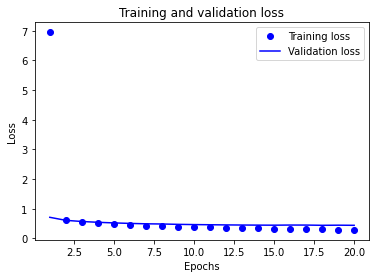

In [97]:
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

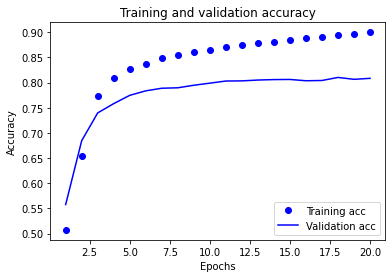

In [98]:
plt.clf()   # clear figure

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [101]:
import operator


value_to_scores = []

for idx in range(len(df_annotations)):
  if df_annotations.train_val.iloc[idx] == "val":
    contexts = all_contexts[idx]
    if len(contexts) == 0:
      value_to_score = {}
    else:
      candidate_values = list(contexts.keys())
      input_texts = np.asarray(list([" ".join(c) for c in contexts.values()  ] ))
      scores = model.predict(input_texts)

      value_to_score = {}
      for j in range(len(contexts)):
        value_to_score[candidate_values[j]] = scores[j][1]
    value_to_scores.append(value_to_score)

1/1 [==============================] - 0s 18ms/step


In [114]:
pred_proba = []

for idx in range(len(df_annotations[df_annotations.train_val == "val"])):
  value_to_score = value_to_scores[idx]
  winning_values = sorted(value_to_score.items(), key=operator.itemgetter(1), reverse=True)
  if len(winning_values) == 0:
    winning_values = []
  else:
    # if winning_values[0][1] < 0.5:
    #   winning_values = winning_values[:1]
    # else:
    winning_values = [v for v in winning_values if v[1] > 0.5]
  pred_proba.append(",".join(sorted(set([w for w, v in winning_values]))))

In [115]:
from sklearn.metrics import accuracy_score

In [116]:
df_val = df_annotations[df_annotations.train_val == "val"]

In [121]:
clean_ground_truth = [",".join(sorted(set(x.split(",")))) for x in df_val.country.apply(str)]

In [117]:
df_val["y_pred"] = pred_proba

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [122]:
accuracy_score(clean_ground_truth, df_val.y_pred.apply(str))

0.4165898617511521

In [127]:
for i in range(10):
  print (clean_ground_truth[i],"\t", df_val.y_pred.apply(str).iloc[i])

BE,BG,BY,CO,DO,EE,ES,GB,GE,GR,GT,HU,IT,PA,PE,PL,RO,RS,RU,TR,UA,ZA 	 NL,US
CN 	 AU,CN,US
US 	 US
DE,ES,HU,IL,SE,US 	 US
US 	 US
US 	 US
US 	 US
AU,BA,BE,CA,CZ,DE,HR,HU,KR,LV,NL,NZ,PL,RS,RU,UA,US 	 NL,US
US 	 US
CA 	 CA,US


In [129]:
num_total = 0
num_correct = 0
num_false_positive = 0
for i in range(len(df_val)):
  gt = set(clean_ground_truth[i].split(","))
  p = set(df_val.y_pred.apply(str).iloc[i].split(","))
  for c in gt:
    num_total += 1
    if c in p:
      num_correct += 1
  
  for c in p:
    if c not in gt:
      num_false_positive += 1

In [130]:
num_correct/num_total

0.3011406844106464

In [131]:
num_false_positive/num_total

0.14195183776932827

In [133]:
model.save("/content/drive/MyDrive/data/country_model_01_keras.keras")